## This project is intended to explore the 2019 stackoverflow survey results and answer some interesting questions about the data. The 3 main questions are

# Business Understanding
#### i'm particularly curious about how different programming languages fared across developers in only “Middle East “ countries

* What is the most common programming language used in the middle east?
* Which Majors Have the highest Job Satisfaction In the middle East?
* Which Majors Have the highest Salary In the middle East?

 [Question 1](#Q1)<br>
 [Question 2](#Q2)<br>
 [Question 3](#Q3)<br>

# Data Understanding

In [2]:
# import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pd.set_option('display.max_rows', 500)  

In [4]:
#read the data
df = pd.read_csv('survey.csv')
pd.set_option('display.max_columns', 154)

# Show df to get an idea of the data
df.head(3)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

# Data Preparation

In [5]:
# get only the needed countries
middle_east_countries=['Israel','Iran','Egypt''Turkey',
                       'United Arab Emirates','Morocco',
                       'Lebanon','Tunisia','Saudi Arabia',
                       'Jordan','Syria','Bahrain','Kuwait'
                       ,'Qatar','Iraq','Oman','Yemen','Algeria','Libya']

In [6]:
# create new data frame
df2=df[df['Country'].isin(middle_east_countries)]

In [7]:
df2.shape

(1562, 154)

In [8]:
# getting only the numerical df
df_num = df2._get_numeric_data()

##### Dealing with missing values

In [9]:
df2['Salary'].isna().sum() #count the missing values in needed numerical columns

1317

In [10]:
df2['JobSatisfaction'].isna().sum() #count the missing values in needed numerical columns

369

In [11]:
# I will not drop any line with a missing value
# instead i will fill in the na by the mean in all needed numerical columns
# needed numerical columns = ['Salary'],['JobSatisfaction']
fill_mean = lambda col: col.fillna(col.mean())
df_num= df_num.apply(fill_mean, axis=0)

In [12]:
# assign it into the main df
df2 = df2.assign(CareerSatisfaction=df_num['CareerSatisfaction'],
                 ExpectedSalary=df_num['ExpectedSalary'],
                 HoursPerWeek=df_num['HoursPerWeek'],
                 JobSatisfaction=df_num['JobSatisfaction'],
                 Respondent=df_num['Respondent'],
                 Salary=df_num['Salary'],
                 StackOverflowSatisfaction=df_num['StackOverflowSatisfaction'])

In [13]:
df2['Salary'].isna().sum() #check

0

In [14]:
df2['JobSatisfaction'].isna().sum() #check

0

# Modeling

<a id="Q1">
    
## Q1: Most common programming language used in the middle east?

In [10]:
study=df2['HaveWorkedLanguage'].value_counts().reset_index() #Provide a pandas series of the counts for each HaveWorkedLanguage status
study

,index,HaveWorkedLanguage
0,C#; JavaScript; SQL,37
1,Java,28
2,JavaScript; PHP,23
3,JavaScript; PHP; SQL,19
4,Java; JavaScript,17
...,...,...
532,C#; Java; VBA,1
533,Assembly; C; C++; C#; JavaScript; PHP; SQL,1
534,Java; JavaScript; PHP; Python; Scala; SQL,1
535,C; Java; Python; Scala,1


In [11]:
#rename some columns
study.rename(columns={'index':'language','HaveWorkedLanguage':'count'},inplace=True)

In [12]:
# possible values in ['HaveWorkedLanguage'] 
possible_vals =['JavaScript','HTML/CSS','SQL','Python',
                'Java','Bash/Shell/PowerShell','C#','PHP'
                ,'C++','TypeScript','C','Ruby','Go','Assembly'
                ,'Swift','Kotlin','R','VBA','Scala','Rust','Dart'
                ,'Elixir','Clojure','WebAssembly','Objective-C','CSS'
                ,'Cobol','CoffeeScript','Erlang','F#','Groovy'
                ,'HTML','Hack']

In [13]:
def total_count(df,col1,col2,look_for):
    '''
    INPUT 
        df - the pandas dataframe you want to search
        col1 - the column name you want to look through
        col2 - the column you want to count values from
        look_for - a list of strings you want to count values from
        
    OUTPUT
        new_df - a data frame of each look_for with the count of how often it shows up 
    '''
    from collections import defaultdict
    new_df = defaultdict(int)
    for val in look_for:
        for idx in range(df.shape[0]):
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df=pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns=[col1,col2]
    new_df.sort_values('count',ascending=False,inplace=True)
    return new_df

In [14]:
# data after arrangement
study2=total_count(study,'language','count',possible_vals)
study2

,language,count
3,Java,782
8,C,605
0,JavaScript,598
1,SQL,515
4,C#,402
2,Python,311
5,PHP,303
6,C++,264
7,TypeScript,103
13,R,97


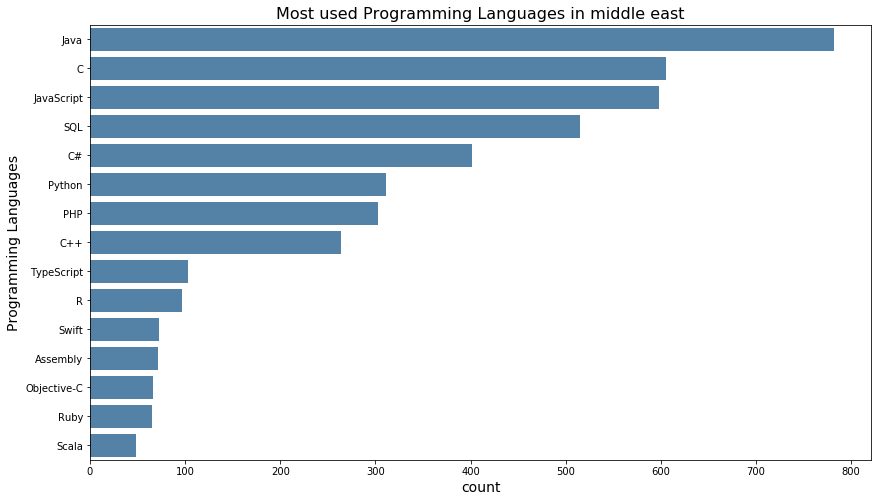

In [15]:
#plot a bar plot to show Most used Programming Languages in middle east 
plt.figure(figsize=(14,8))
sns.barplot(x = 'count', 
            y = 'language',
            data = study2.iloc[:15],
           color='steelblue')

plt.title('Most used Programming Languages in middle east', size = 16)
plt.xlabel("count", fontsize = 14)
plt.ylabel("Programming Languages", fontsize = 14)
plt.show()

JAVA, C, JAVASCRIPT, SQL are the top 4 most popular language among developers in the Middle East.

<a id="Q2">
    
## Q2: Which Majors Have the highest Job Satisfaction In the middle East?

In [16]:
major=pd.DataFrame(df2.groupby(['MajorUndergrad']).mean()['JobSatisfaction'].sort_values()).reset_index()
major

,MajorUndergrad,JobSatisfaction
0,"Information technology, networking, or system ...",6.343125
1,A business discipline,6.430742
2,A natural science,6.549548
3,A non-computer-focused engineering discipline,6.605681
4,Computer programming or Web development,6.749930
5,Fine arts or performing arts,6.792791
6,I never declared a major,6.890989
7,Computer science or software engineering,6.945374
8,Psychology,6.994851
9,Mathematics or statistics,7.015355


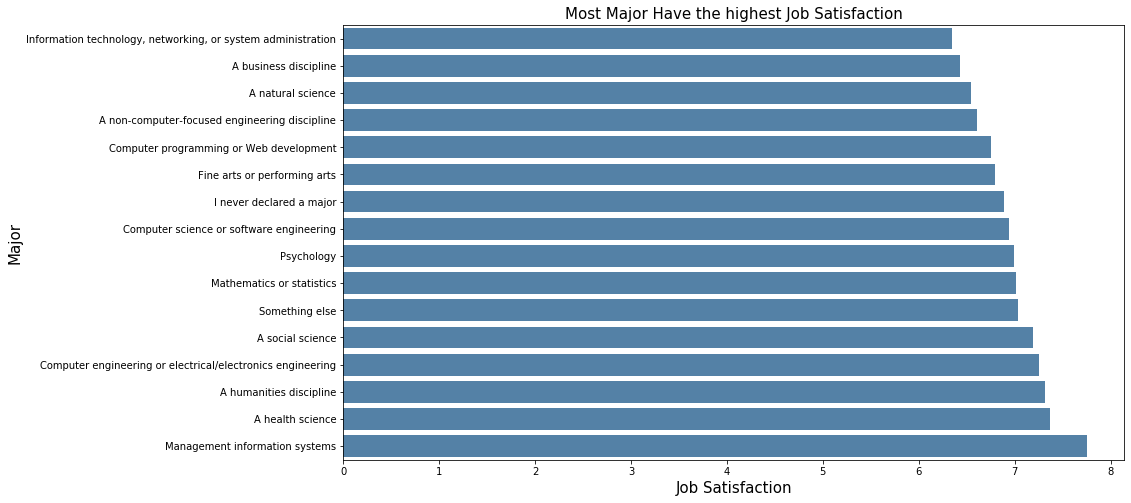

In [17]:
plt.figure(figsize=(14,8))
sns.barplot(y='MajorUndergrad', 
            x='JobSatisfaction',
            data = major,
           color='steelblue')

plt.title('Most Major Have the highest Job Satisfaction', size = 15)
plt.xlabel("Job Satisfaction", fontsize = 15)
plt.ylabel("Major", fontsize = 15)
plt.show()

Clearly Management information systems is the most major that have the highest Job Satisfaction In the Middle East.

<a id="Q3">
    
## Q3: Which Majors Have the highest Salary In the middle East?

In [18]:
sal=pd.DataFrame(df2.groupby(['MajorUndergrad']).mean()['Salary'].sort_values()).reset_index()
sal

,MajorUndergrad,Salary
0,Mathematics or statistics,39965.135961
1,A business discipline,40416.595068
2,Computer programming or Web development,41605.522169
3,A natural science,41654.628484
4,A non-computer-focused engineering discipline,42243.922717
5,"Information technology, networking, or system ...",43083.988868
6,A health science,45307.818581
7,Computer engineering or electrical/electronics...,45416.535473
8,Computer science or software engineering,46211.102458
9,Psychology,47406.701641


Text(0.5, 0, 'Salary')

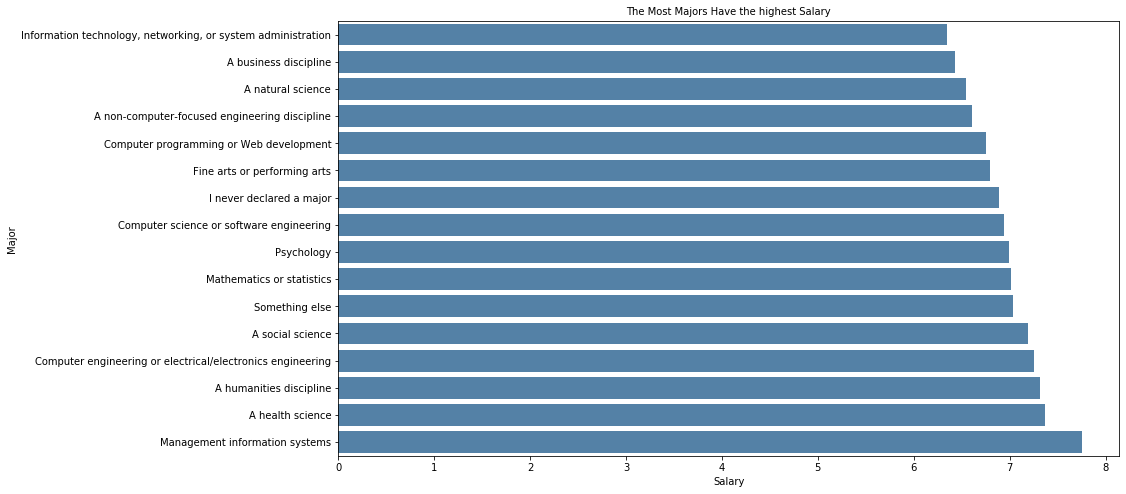

In [19]:
plt.figure(figsize=(14,8))
sns.barplot(y='MajorUndergrad',
            x='JobSatisfaction',
           data = major,
           color='steelblue')
plt.title('The Most Majors Have the highest Salary', size = 10)
plt.ylabel("Major", fontsize = 10)
plt.xlabel("Salary", fontsize = 10)

Also here Management information systems is the most major that have the highest Salary In the Middle East.

# Evaluation

### it seems that Middle Eastern developers tend to use Java as the most used programming language.

### Also, after analyzing the data of only the middle eastern developers, it became clear that the developers who has Management information systems major has highest percentage of Job Satisfaction and Salary.